In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

<Axes: >

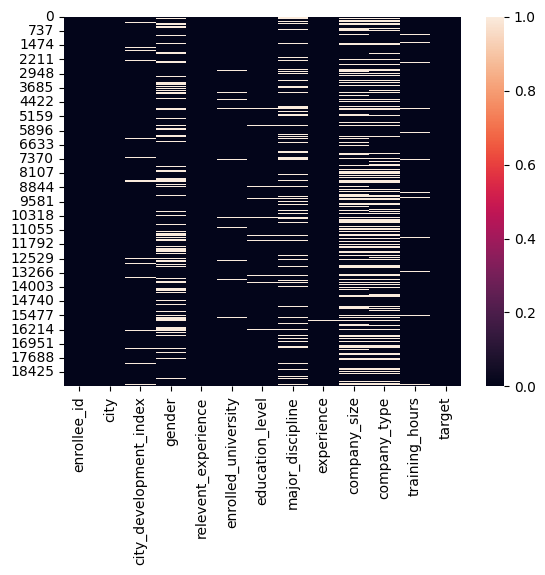

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

How to get columns whose missing value are less than 5%

In [9]:
cols=[var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() >0 ]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
16794,0.887,no_enrollment,High School,16.0,178.0
7822,0.915,no_enrollment,Graduate,20.0,20.0
5974,0.920,no_enrollment,Graduate,5.0,72.0
4010,0.739,no_enrollment,Graduate,20.0,44.0
9459,0.913,Full time course,High School,2.0,22.0


In [12]:
new_df=df[cols].dropna()

In [13]:
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [15]:
len(new_df)/len(df)

0.8968577095730244

<Axes: xlabel='training_hours', ylabel='Count'>

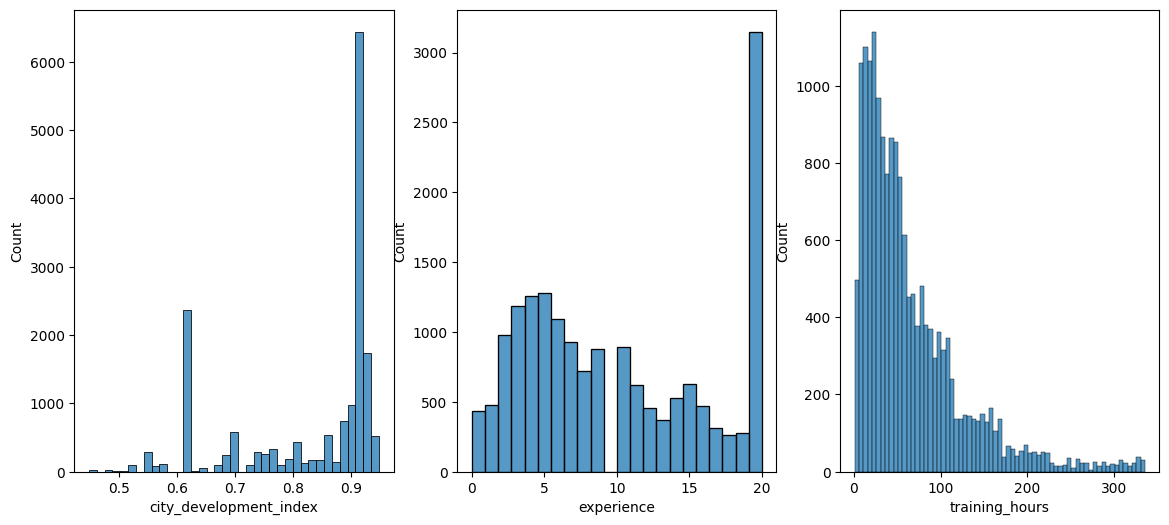

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(131)
sns.histplot(new_df,x="city_development_index")

plt.subplot(132)
sns.histplot(new_df,x="experience")

plt.subplot(133)
sns.histplot(new_df,x="training_hours")

<Axes: xlabel='training_hours', ylabel='Count'>

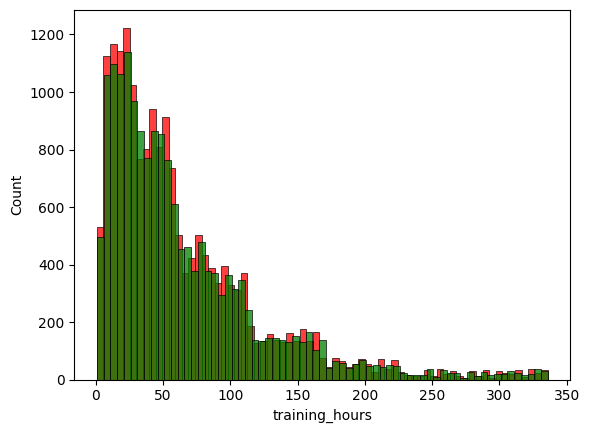

In [22]:
sns.histplot(df,x="training_hours",color="red")
sns.histplot(new_df,x="training_hours",color="green")

<Axes: xlabel='experience', ylabel='Count'>

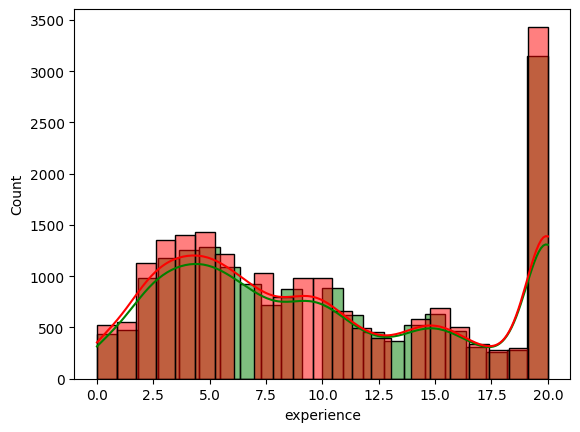

In [25]:
sns.histplot(new_df,x="experience",color="green",kde=True)
sns.histplot(df,x="experience",color="red",kde=True)

<Axes: xlabel='city_development_index', ylabel='Count'>

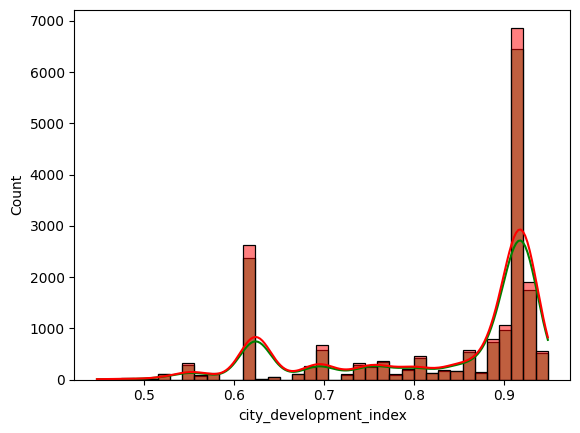

In [29]:
sns.histplot(new_df,x="city_development_index",color="green",kde=True)
sns.histplot(df,x="city_development_index",color="red",kde=True)

Text(0.5, 1.0, 'after')

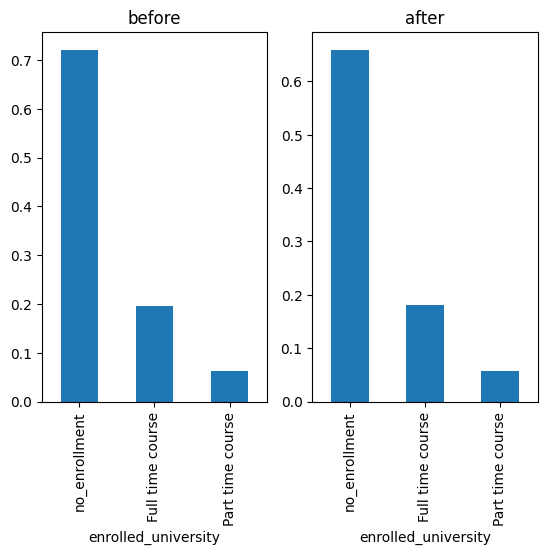

In [39]:
plt.subplot(121)
(df["enrolled_university"].value_counts()/len(df)).plot(kind="bar")
plt.title("before")
plt.subplot(122)
(new_df["enrolled_university"].value_counts()/len(df)).plot(kind="bar")
plt.title("after")

<Axes: xlabel='enrolled_university'>

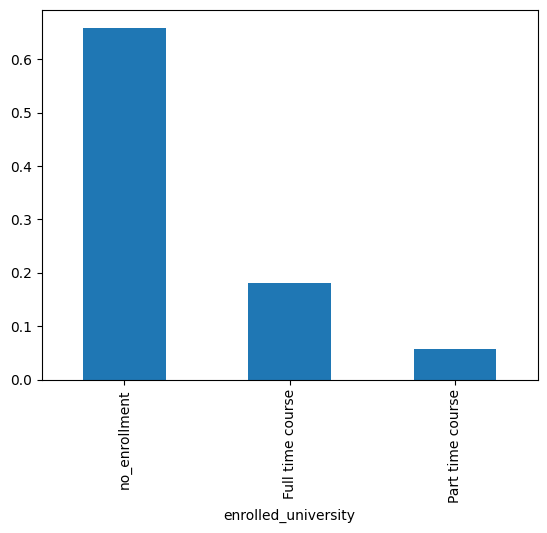

In [35]:

(new_df["enrolled_university"].value_counts()/len(df)).plot(kind="bar")